In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from graspy.match import GraphMatch as GMP
from graspy.simulations import er_np


In [4]:
n = 50
p = 0.3

np.random.seed(1)
G1 = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)
G2 = G1[np.ix_(node_shuffle_input, node_shuffle_input)]
print("Number of edge disagreements: ", sum(sum(abs(G1-G2))))

Number of edge disagreements:  1012.0


<AxesSubplot:title={'center':'G2 [G1 Randomly Shuffled]'}>

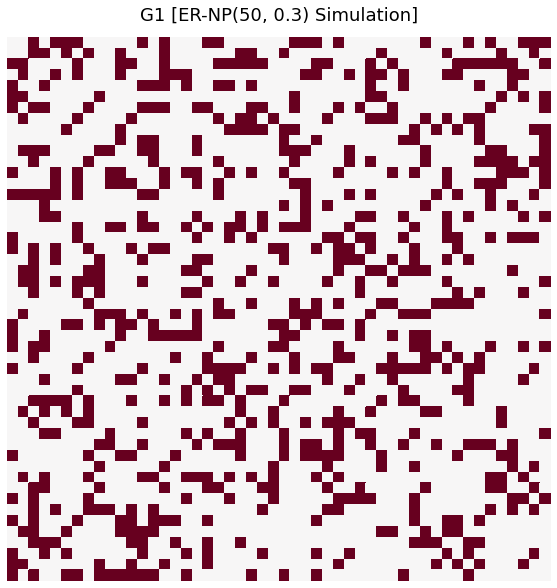

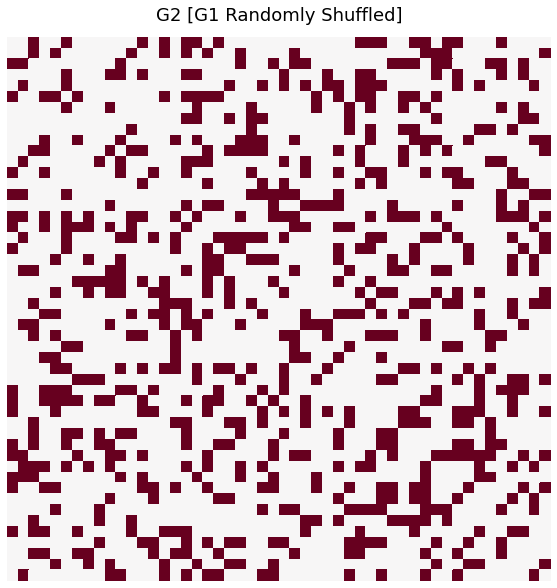

In [5]:
from graspy.plot import heatmap
heatmap(G1, cbar=False, title = 'G1 [ER-NP(50, 0.3) Simulation]')
heatmap(G2, cbar=False, title = 'G2 [G1 Randomly Shuffled]')

In [6]:
gmp = GMP()
gmp = gmp.fit(G1,G2)
G2 = G2[np.ix_(gmp.perm_inds_, gmp.perm_inds_)]
print("Number of edge disagreements: ", sum(sum(abs(G1-G2))))


Number of edge disagreements:  0.0


<AxesSubplot:title={'center':'G2[ER-NP(50, 0.3) Randomly Shuffled] unshuffled'}>

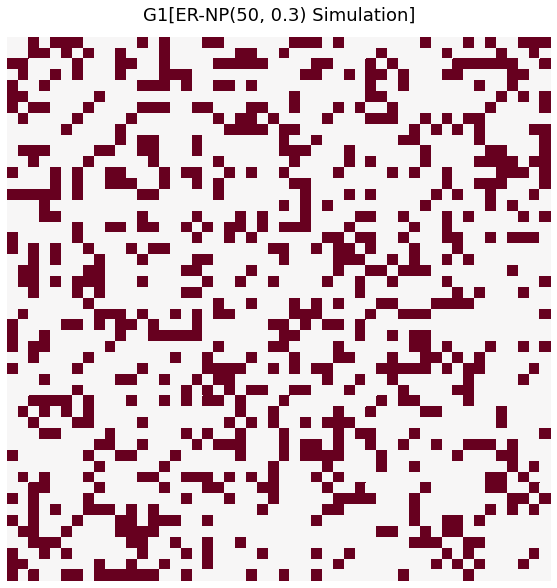

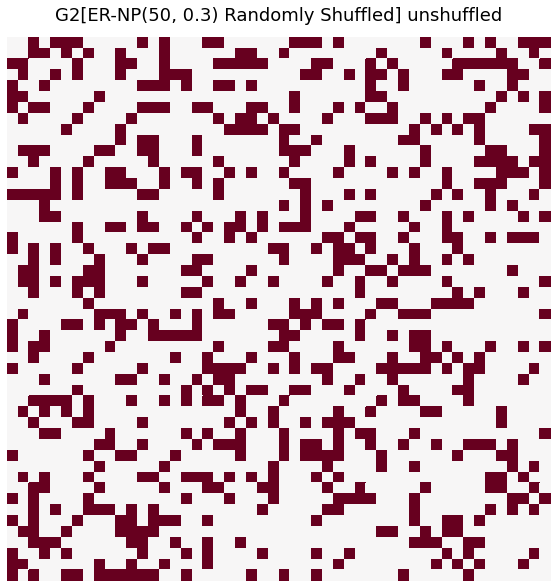

In [7]:
heatmap(G1, cbar=False, title = 'G1[ER-NP(50, 0.3) Simulation]')
heatmap(G2, cbar=False, title = 'G2[ER-NP(50, 0.3) Randomly Shuffled] unshuffled')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
np.random.seed(8888)

In [9]:
from graspy.match import GraphMatch as GMP
from graspy.plot import heatmap
from graspy.simulations import er_corr, sbm, sbm_corr

<AxesSubplot:title={'center':'Diff (G1 - G2)'}>

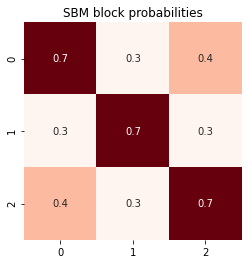

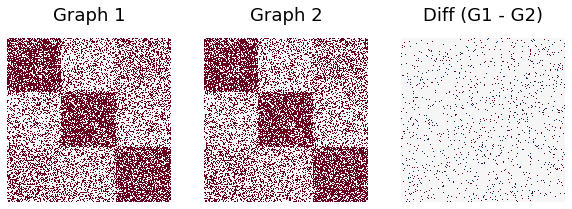

In [10]:
directed = False
loops = False
n_per_block = 75
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = .9
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.heatmap(block_probs, cbar=False, annot=True, square=True, cmap="Reds", ax=ax)
ax.set_title("SBM block probabilities")

A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2, ax=axs[1], cbar=False, title="Graph 2")
heatmap(A1 - A2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")

<AxesSubplot:title={'center':'Diff (G1 - G2 shuffled)'}>

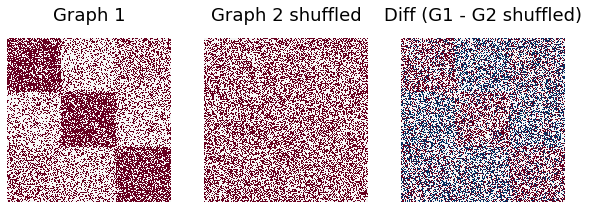

In [11]:
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2_shuffle, ax=axs[1], cbar=False, title="Graph 2 shuffled")
heatmap(A1 - A2_shuffle, ax=axs[2], cbar=False, title="Diff (G1 - G2 shuffled)")


Match Ratio with no seeds:  0.013333333333333308


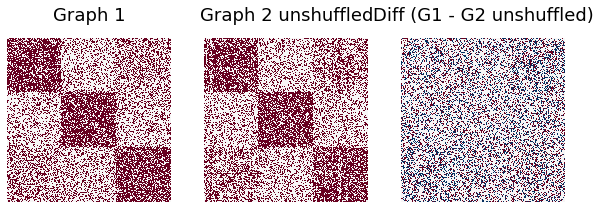

In [12]:
sgm = GMP()
sgm = sgm.fit(A1,A2_shuffle)
A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2_unshuffle, ax=axs[1], cbar=False, title="Graph 2 unshuffled")
heatmap(A1 - A2_unshuffle, ax=axs[2], cbar=False, title="Diff (G1 - G2 unshuffled)")

match_ratio = 1-(np.count_nonzero(abs(sgm.perm_inds_-node_unshuffle_input))/n_verts)
print("Match Ratio with no seeds: ", match_ratio)

Match Ratio with 10 seeds:  1.0


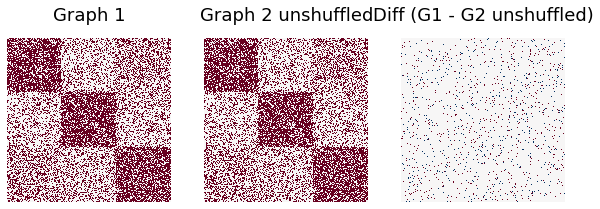

In [13]:
W1 = np.sort(random.sample(list(range(n_verts)),10))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])

sgm = GMP()
sgm = sgm.fit(A1,A2_shuffle,W1,W2)
A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2_unshuffle, ax=axs[1], cbar=False, title="Graph 2 unshuffled")
heatmap(A1 - A2_unshuffle, ax=axs[2], cbar=False, title="Diff (G1 - G2 unshuffled)")

match_ratio = 1-(np.count_nonzero(abs(sgm.perm_inds_-node_unshuffle_input))/n_verts)
print("Match Ratio with 10 seeds: ", match_ratio)
